<a href="https://colab.research.google.com/github/paragkhandait94/OCR/blob/main/OCR_using_paddleocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!python3 -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

# Opening the image

In [20]:
import cv2
from matplotlib import pyplot as plt
# image_file = "/content/images/driving-licence.jpeg"
# img = cv2.imread(image_file)

In [18]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [ ]:
display(image_file)

# 03: Binarization

In [ ]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_image = grayscale(img)
cv2.imwrite("/content/gray1.jpg", gray_image)

True

In [ ]:
display("/content/gray1.jpg")

In [ ]:
thresh, im_bw = cv2.threshold(gray_image, 200, 220, cv2.THRESH_BINARY)
cv2.imwrite("/content/bw_image1.jpg", im_bw)

True

In [ ]:
display("/content/bw_image1.jpg")

# 04: Noise Removal

In [ ]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [ ]:
no_noise = noise_removal(gray_image)
cv2.imwrite("/content/no_noise1.jpg", no_noise)

True

In [ ]:
display("/content/no_noise1.jpg")

# Erosion or Dilation

In [ ]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [ ]:
eroded_image = thin_font(im_bw)
cv2.imwrite("/content/eroded_image1.jpg", eroded_image)

True

In [ ]:
display("/content/eroded_image1.jpg")

# OCR

In [ ]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False) # need to run only once to download and load model into memory
img_path = '/content/no_noise1.jpg'
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

In [ ]:
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')



# Edge Detection of a pan card

In [14]:
import cv2
import numpy as np

def crop_document(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the maximum area (assumed to be the document border)
    max_contour = max(contours, key=cv2.contourArea)

    # Create a mask and draw the contour on it
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [max_contour], -1, (255), thickness=cv2.FILLED)

    # Bitwise AND the mask with the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Find the bounding box of the contour
    x, y, w, h = cv2.boundingRect(max_contour)

    # Crop the image using the bounding box
    cropped_image = result[y:y+h, x:x+w]

    # Display the original and cropped images
    # cv2.imshow('Original Image', image)
    # cv2.imshow('Cropped Image', cropped_image)

    # Save the cropped image
    cv2.imwrite('cropped_pan_card.jpg', cropped_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()



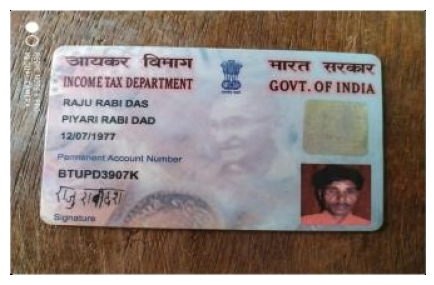

In [21]:
# Replace 'path/to/your/pan_card.jpg' with the actual path to your PAN card image
crop_document('/content/pan_card/sample-pan-3.jpg')
display('/content/cropped_pan_card.jpg')